In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy, scipy
from IPython.display import display

sympy.init_printing(use_latex='mathjax')

# F1 Braking System Analysis

This document details how preliminary preformances of a **F1 vehicle braking system** can be defined, starting from a set of assumption.

## Problem description

It is necessary to define which are the performances required from a braking system in order to proceed with the design of the equipment. The braking system must guarantee the best braking performance, i.e., the braking system must not be the limiting factor. This means that the braking system must be able to bring the vehicle to the limits of its braking performance.

The performance to be defined are:
-  Maximum braking torques ($T_f$, $T_r$),
-  Single braking energy ($E_f$, $E_r$),
-  Thermal power dissipation ($\dot{Q}_f$, $\dot{Q}_r$).

Consider the following diagram:
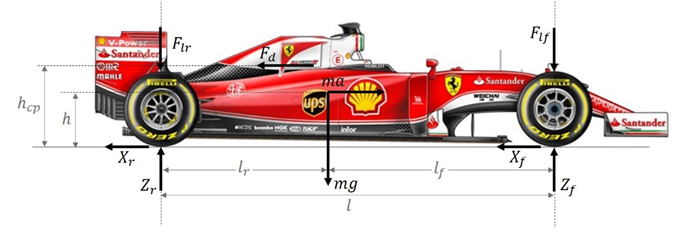

By definition, the braking limit is given by the maximum _friction coefficient_ ($\mu$) between tyre and road, and the maximum _braking force_ ($X_f$, $X_r$) is function of the vertical load on the tyre ($Z_f$, $Z_r$) (thus considering an theoretically optimal brake balance set-up):

In [2]:
t = sympy.symbols('t')
v, X_f, X_r, Z_f, Z_r = sympy.symbols('v X_f X_r Z_f Z_r', cls=sympy.Function)
mu = sympy.symbols('mu', real=True, positive=True)

f_eq = sympy.Eq(X_f(v(t)), mu * Z_f(v(t)))

r_eq = sympy.Eq(X_r(v(t)), mu * Z_r(v(t)))

display(f_eq)
display(r_eq)

X_f(v(t)) = μ⋅Z_f(v(t))

Xᵣ(v(t)) = μ⋅Zᵣ(v(t))

<div class="alert alert-block alert-warning">
    <b>Warning:</b> the above relations hold <b>only</b> for $v>0$. When integrating any differential equation over time, care must be taken to consider only positive speed, in order to avoid any erroneous result.
</div>

The dynamic equilibrium (horizontal, vertical and rotational at the center of mass) gives:

In [3]:
a, F_d, F_lf, F_lr = sympy.symbols('a F_d F_lf F_lr', cls=sympy.Function)
m, g, alpha, l, h, h_cp = sympy.symbols('m g alpha l h h_cp', real=True, positive=True)

h_eq = sympy.Eq(m * a(t), - X_f(v(t)) - X_r(v(t)) - F_d(v(t)))

v_eq = sympy.Eq(m * g + F_lf(v(t)) + F_lr(v(t)), Z_f(v(t)) + Z_r(v(t)))

rot_eq = sympy.Eq(alpha * l * Z_f(v(t)) + (1 - alpha) * l * F_lr(v(t)) + (h_cp - h) * F_d(v(t)),
                  (1 - alpha) * l * Z_r(v(t)) + h * (X_r(v(t)) + X_f(v(t))) + alpha * l * F_lf(v(t)))

display(h_eq)
display(v_eq)
display(rot_eq)

m⋅a(t) = -F_d(v(t)) - X_f(v(t)) - Xᵣ(v(t))

g⋅m + F_lf(v(t)) + Fₗᵣ(v(t)) = Z_f(v(t)) + Zᵣ(v(t))

α⋅l⋅Z_f(v(t)) + l⋅(-α + 1)⋅Fₗᵣ(v(t)) + (-h + h_cp)⋅F_d(v(t)) = α⋅l⋅F_lf(v(t)) 
+ h⋅(X_f(v(t)) + Xᵣ(v(t))) + l⋅(-α + 1)⋅Zᵣ(v(t))

where:
$$
\alpha = \frac{l_f}{l} = \frac{l_f}{l_f + l_r}
$$

Once the braking forces are known, single-corner braking torques $T_f$ and $T_r$ can be obtained with:

In [4]:
r_f, r_r = sympy.symbols('r_f r_r', real=True, positive=True)
T_f, T_r = sympy.symbols('T_f T_r', cls=sympy.Function)

torque_fun = lambda r, force: r * force

front_torque_eq = sympy.Eq(T_f(v(t)),torque_fun(r_f,0.5 * X_f(v(t))))
rear_torque_eq = sympy.Eq(T_r(v(t)),torque_fun(r_r,0.5 * X_r(v(t))))

display(front_torque_eq)
display(rear_torque_eq)

T_f(v(t)) = 0.5⋅r_f⋅X_f(v(t))

Tᵣ(v(t)) = 0.5⋅rᵣ⋅Xᵣ(v(t))

The single-corner cumulated braking energies $E_f(\tau)$ and $E_r(\tau)$ can be computed as:

In [5]:
E_f, E_r, P_f, P_r = sympy.symbols('E_f E_r P_f P_r', cls=sympy.Function)
t_0, t_end, tau = sympy.symbols('t_0 t_end tau', positive=True, real=True)

front_energy_eq = sympy.Eq(E_f(tau),sympy.Integral(P_f(v(t)),(t,0,tau)))
rear_energy_eq = sympy.Eq(E_r(tau),sympy.Integral(P_r(v(t)),(t,0,tau)))

display(front_energy_eq)
display(rear_energy_eq)

         τ             
         ⌠             
E_f(τ) = ⎮ P_f(v(t)) dt
         ⌡             
         0             

        τ            
        ⌠            
Eᵣ(τ) = ⎮ Pᵣ(v(t)) dt
        ⌡            
        0            

where single-corner braking powers $P_f$ and $P_r$ are defined as:

In [6]:
pow_fun = lambda v, X: v * X

front_power_eq = sympy.Eq(P_f(v(t)),pow_fun(v(t), 0.5 * X_f(v(t))))
rear_power_eq = sympy.Eq(P_r(v(t)),pow_fun(v(t), 0.5 * X_r(v(t))))

display(front_power_eq)
display(rear_power_eq)

P_f(v(t)) = 0.5⋅X_f(v(t))⋅v(t)

Pᵣ(v(t)) = 0.5⋅Xᵣ(v(t))⋅v(t)

and the corresponding total braking energies $E_{f}^{tot}$ and $E_{r}^{tot}$:

In [7]:
E_f_tot, E_r_tot = sympy.symbols('E_f^tot E_r^tot', positive=True, real=True)

front_tot_energy_eq = sympy.Eq(E_f_tot,E_f(t_end))
rear_tot_energy_eq = sympy.Eq(E_r_tot,E_r(t_end))

display(front_tot_energy_eq)
display(rear_tot_energy_eq)

E_f__tot = E_f(t_end)

E_r__tot = Eᵣ(t_end)

where $t_{end}$ is the time at which the final braking speed $v_{end}$ is reached:

In [8]:
v_end = sympy.symbols('v_end', positive=True, real=True)

final_speed_eq = sympy.Eq(v(t_end),v_end)

display(final_speed_eq)

v(t_end) = v_end

In order to prevent overheating, the braking system should be able to thermally dissipate the energy stored during the braking events. Once the braking system reaches its thermal working point, it should be able to completely dissipate the braking energy over a complete lap, i.e., the system should be able to return to the nominal working temperature.

Since every racing circuit is different and the number and intensity of braking events over a complete lap is difficult to define precisely, the thermal dissipation required $\dot{Q}$ will be estimated as a percentual increase from the last championship, considering the analogous braking energy increase $\Delta E_b$:

In [9]:
t_diss = sympy.symbols('t_diss', real=True, positive=True)
P_th_f_curr, P_th_f_past, delta_P_th_f = sympy.symbols(('\dot{Q}_f', r'\left.\dot{Q}_f\right|_{past}', '\Delta\dot{Q}_f'))
P_th_r_curr, P_th_r_past, delta_P_th_r = sympy.symbols(('\dot{Q}_r', r'\left.\dot{Q}_r\right|_{past}', '\Delta\dot{Q}_r'))
E_f_past, delta_E_f = sympy.symbols((r'\left.E_f^{tot}\right|_{past}', r'\Delta\ E_f^{tot}'))
E_r_past, delta_E_r = sympy.symbols((r'\left.E_r^{tot}\right|_{past}', r'\Delta\ E_r^{tot}'))

display(sympy.Eq(delta_P_th_f, delta_E_f))
display(sympy.Eq(delta_P_th_r, delta_E_r))

display(sympy.Eq(delta_P_th_f, (P_th_f_curr-P_th_f_past)/P_th_f_past))
display(sympy.Eq(delta_P_th_r, (P_th_r_curr-P_th_r_past)/P_th_r_past))

display(sympy.Eq(delta_E_f, (E_f_tot-E_f_past)/E_f_past))
display(sympy.Eq(delta_E_r, (E_r_tot-E_r_past)/E_r_past))

\Delta\dot{Q}_f = \Delta E_f__{tot}

\Delta\dot{Q}ᵣ = \Delta E_r__{tot}

                  \dot{Q}_f - \left.\dot{Q}_f\right|_{past}
\Delta\dot{Q}_f = ─────────────────────────────────────────
                        \left.\dot{Q}_f\right|_{past}      

                 \dot{Q}ᵣ - \left.\dot{Q}_r\right|_{past}
\Delta\dot{Q}ᵣ = ────────────────────────────────────────
                      \left.\dot{Q}_r\right|_{past}      

                    E_f__tot - \left.E_f_{past}__{tot}\right|
\Delta E_f__{tot} = ─────────────────────────────────────────
                          \left.E_f_{past}__{tot}\right|     

                    E_r__tot - \left.E_r_{past}__{tot}\right|
\Delta E_r__{tot} = ─────────────────────────────────────────
                          \left.E_r_{past}__{tot}\right|     

## Analytical Solution

Solving the system of equations for $a$, $X_f$, $X_r$, $Z_f$ and $Z_r$:

In [10]:
unkn = [a(t), X_f(v(t)), X_r(v(t)), Z_f(v(t)), Z_r(v(t))]

sol_aero = sympy.linsolve([h_eq, v_eq, rot_eq, f_eq, r_eq],unkn).args[0]

for i in range(0,5):
    display(sympy.Eq(unkn[i],sol_aero[i]))

       -(g⋅m⋅μ + μ⋅F_lf(v(t)) + μ⋅Fₗᵣ(v(t)) + F_d(v(t))) 
a(t) = ──────────────────────────────────────────────────
                               m                         

            μ⋅(-α⋅g⋅l⋅m + g⋅h⋅m⋅μ + g⋅l⋅m + h⋅μ⋅F_lf(v(t)) + h⋅μ⋅Fₗᵣ(v(t)) + h
X_f(v(t)) = ──────────────────────────────────────────────────────────────────
                                                                  l           

⋅F_d(v(t)) - h_cp⋅F_d(v(t)) + l⋅F_lf(v(t)))
───────────────────────────────────────────
                                           

           -μ⋅(-α⋅g⋅l⋅m + g⋅h⋅m⋅μ + h⋅μ⋅F_lf(v(t)) + h⋅μ⋅Fₗᵣ(v(t)) + h⋅F_d(v(t
Xᵣ(v(t)) = ───────────────────────────────────────────────────────────────────
                                                             l                

)) - h_cp⋅F_d(v(t)) - l⋅Fₗᵣ(v(t))) 
───────────────────────────────────
                                   

            -α⋅g⋅l⋅m + g⋅h⋅m⋅μ + g⋅l⋅m + h⋅μ⋅F_lf(v(t)) + h⋅μ⋅Fₗᵣ(v(t)) + h⋅F_
Z_f(v(t)) = ──────────────────────────────────────────────────────────────────
                                                                l             

d(v(t)) - h_cp⋅F_d(v(t)) + l⋅F_lf(v(t))
───────────────────────────────────────
                                       

           α⋅g⋅l⋅m - g⋅h⋅m⋅μ - h⋅μ⋅F_lf(v(t)) - h⋅μ⋅Fₗᵣ(v(t)) - h⋅F_d(v(t)) + 
Zᵣ(v(t)) = ───────────────────────────────────────────────────────────────────
                                                          l                   

h_cp⋅F_d(v(t)) + l⋅Fₗᵣ(v(t))
────────────────────────────
                            

The above equations are expressed in terms of physical characteristics of the vehicle ($\mu$, $m$, $h$, $h_{cp}$, $l$, and $\alpha$), as well as aerodynamic forces ($F_{lf}$, $F_{lr}$, $F_d$).<br>
Aerodynamic forces are defined as:

In [11]:
q, C_lf, C_lr = sympy.symbols('q C_lf C_lr', cls=sympy.Function)
Cd, S = sympy.symbols('C_d S', real=True, positive=True)

F_aero_fun = lambda q, S, C: q * S * C

fl_eq = sympy.Eq(F_lf(v(t)),F_aero_fun(q(v(t)),S,C_lf(v(t))))
rl_eq = sympy.Eq(F_lr(v(t)),F_aero_fun(q(v(t)),S,C_lr(v(t))))
drag_eq = sympy.Eq(F_d(v(t)),F_aero_fun(q(v(t)),S,Cd))

display(fl_eq)
display(rl_eq)
display(drag_eq)

F_lf(v(t)) = S⋅C_lf(v(t))⋅q(v(t))

Fₗᵣ(v(t)) = S⋅Cₗᵣ(v(t))⋅q(v(t))

F_d(v(t)) = C_d⋅S⋅q(v(t))

where $S$ is the vehicle front area, $C_{lf}$, $C_{lr}$ and $C_d$ are the aerodynamic coefficients and $q$ is the dynamic pressure, defined as:

In [12]:
rho = sympy.symbols('rho', real=True, positive=True)

q_fun = lambda v, rho: .5 * rho * pow(v,2)

dyn_press_eq = sympy.Eq(q(v(t)),q_fun(v(t),rho))

display(dyn_press_eq)

                 2   
q(v(t)) = 0.5⋅ρ⋅v (t)

The variation of lift's distribution on front and rear axle with the speed is taken into account introducing the _aerobalance_ term ($A_b$), defined as:

In [13]:
k1, k2, k3 = sympy.symbols('k_1 k_2 k_3', real=True)
Ab = sympy.symbols('A_b', cls=sympy.Function)

Ab_fun = lambda k1, k2, k3, v: k1 * pow(v,2) + k2 * v + k3

ab_eq = sympy.Eq(Ab(v(t)),Ab_fun(k1, k2, k3, v(t)))

display(ab_eq)

                2                  
A_b(v(t)) = k₁⋅v (t) + k₂⋅v(t) + k₃

from which the front and rear lift coefficients can be obtained once the overall lift coefficient ($C_l$) is known:

In [14]:
Cl = sympy.symbols('C_l', real=True)

Clf_fun = lambda Ab, Cl: Ab * Cl
Clr_fun = lambda Ab, Cl: (1 - Ab) * Cl

front_cl_eq = sympy.Eq(C_lf(v(t)),Clf_fun(Ab(v(t)),Cl))
rear_cl_eq = sympy.Eq(C_lr(v(t)),Clr_fun(Ab(v(t)),Cl))

display(front_cl_eq)
display(rear_cl_eq)

C_lf(v(t)) = Cₗ⋅A_b(v(t))

Cₗᵣ(v(t)) = Cₗ⋅(-A_b(v(t)) + 1)

Substituting the aerodynamic forces within the previous solution yields the explicit functions for $a(v(t))$, $X_f(v(t))$, $X_r(v(t))$, $Z_f(v(t))$ and $Z_r(v(t))$.

In [15]:
#sol = sol_aero.subs([(F_d(v(t)), F_aero_fun(q_fun(v(t), rho), S, Cd)),
#                     (F_lf(v(t)), F_aero_fun(q_fun((v(t)), rho), S, Clf_fun(Ab_fun(k1, k2, k3, (v(t))), Cl))),
#                     (F_lr(v(t)), F_aero_fun(q_fun((v(t)), rho), S, Clr_fun(Ab_fun(k1, k2, k3, (v(t))), Cl)))])

aero_dict = {F_d(v(t)): drag_eq.rhs,
             F_lf(v(t)): fl_eq.rhs,
             F_lr(v(t)): rl_eq.rhs,
             q(v(t)): dyn_press_eq.rhs,
             C_lf(v(t)): front_cl_eq.rhs,
             C_lr(v(t)): rear_cl_eq.rhs,
             Ab(v(t)): ab_eq.rhs}

sol = sol_aero.subs(aero_dict).subs(aero_dict).subs(aero_dict)
simp_sol = []

for i in range(0,5):
    simp_sol.append(sympy.collect(sympy.expand(sol[i]),v(t)))
    #display(sympy.Eq(unkn[i],simp_sol[i]))

#simp_sol = sympy.simplify(sol)

#for i in range(0,5):
#    display(sympy.Eq(unkn[i],simp_sol[i]))

It is also possible to obtain the analytical forms of the braking torques $T_f(v(t))$, $T_r(v(t))$ and braking energies $E_r(v(t))$, $E_f(v(t))$.

In [16]:
torque_pow_dict = {X_f(v(t)): simp_sol[1],
                   X_r(v(t)): simp_sol[2],
                   P_f(v(t)): front_power_eq.rhs,
                   P_r(v(t)): rear_power_eq.rhs}

torque_dict = {X_f(v(t)): simp_sol[1],
               X_r(v(t)): simp_sol[2]}

pow_dict = {P_f(v(t)): sympy.collect(sympy.expand(front_power_eq.rhs.subs(torque_dict)),v(t)),
            P_r(v(t)): sympy.collect(sympy.expand(rear_power_eq.rhs.subs(torque_dict)),v(t))}

front_torque_speed_sol = front_torque_eq.subs(torque_dict)
rear_torque_speed_sol = rear_torque_eq.subs(torque_dict)

front_energy_speed_sol = front_energy_eq.xreplace(pow_dict)
rear_energy_speed_sol = rear_energy_eq.xreplace(pow_dict)

#front_energy_speed_sol = front_energy_eq.xreplace(torque_pow_dict).xreplace(torque_pow_dict)
#rear_energy_speed_sol = rear_energy_eq.xreplace(torque_pow_dict).xreplace(torque_pow_dict)

#display(sympy.collect(sympy.expand(front_power_eq.rhs.subs(torque_dict)),v(t)))

#display(front_torque_speed_sol)
#display(rear_torque_speed_sol)
#display(front_energy_speed_sol)
#display(rear_energy_speed_sol)

All these solutions are expressed as functions of the vehicle speed $v(t)$, that can be analytically determined by integrating the first equation:

In [17]:
speed_eq = sympy.Eq(v(t).diff(t),sympy.collect(simp_sol[0],v(t)))
display(speed_eq)

d                 ⎛  0.5⋅C_d⋅S⋅ρ   0.5⋅Cₗ⋅S⋅μ⋅ρ⎞  2   
──(v(t)) = -g⋅μ + ⎜- ─────────── - ────────────⎟⋅v (t)
dt                ⎝       m             m      ⎠      

That is in the form:

In [18]:
A, B = sympy.symbols('Alpha Beta', real=True, positive=True)
dummy_eq = sympy.Eq(v(t).diff(t)+A*pow(v(t),2)+B)
#dummy_eq = sympy.Eq(v(t).diff(t),-pow(v(t),2)-1)
display(dummy_eq)
const_dict = {A: 0.5*rho*S*(Cd + mu*Cl)/m,
              B: g*mu}
display(const_dict)

   2          d           
Α⋅v (t) + Β + ──(v(t)) = 0
              dt          

⎧   0.5⋅S⋅ρ⋅(C_d + Cₗ⋅μ)        ⎫
⎨Α: ────────────────────, Β: g⋅μ⎬
⎩            m                  ⎭

The general solution of this differential equation is:

In [19]:
gen_dummy_sol = sympy.dsolve(dummy_eq,v(t))
#dummy_sol = sympy.dsolve(v(t).diff(t)+pow(v(t),2)+1)
display(gen_dummy_sol)

       √Β⋅tan(√Α⋅√Β⋅(C₁ - t))
v(t) = ──────────────────────
                 √Α          

The speed function is in the form:

In [20]:
C, D = sympy.symbols('Gamma Delta', positive=True, real=True)
dummy_const = sympy.symbols('Epsilon')
dummy_speed_fun = sympy.Eq(v(t),C*sympy.tan(D*(dummy_const - t)))
display(dummy_speed_fun)
speed_fun_const = {C: sympy.sqrt(B/A),
                   D: sympy.sqrt(A*B)}
display(speed_fun_const)

v(t) = Γ⋅tan(Δ⋅(Ε - t))

⎧             √Β⎫
⎨Δ: √Α⋅√Β, Γ: ──⎬
⎩             √Α⎭

Given an initial speed $v(0) = v_0$, it is possible to evaluate the exact solution:

In [21]:
v_0 = sympy.symbols('v_0', positive = True, real=True)

const = sympy.solve(dummy_speed_fun.rhs.subs(t,0)-v_0,dummy_const,dict=True)[0]

display(const)
display(sympy.simplify(dummy_speed_fun.subs(const)))
#display(sympy.simplify(dummy_speed_fun.subs(const)).subs(speed_fun_const))

speed_eq_param_sol = sympy.simplify(sympy.simplify(dummy_speed_fun.subs(const)).subs(speed_fun_const).subs(const_dict))

#display(speed_eq_param_sol)

⎧       ⎛v₀⎞⎫
⎪   atan⎜──⎟⎪
⎨       ⎝Γ ⎠⎬
⎪Ε: ────────⎪
⎩      Δ    ⎭

             ⎛          ⎛v₀⎞⎞
v(t) = -Γ⋅tan⎜Δ⋅t - atan⎜──⎟⎟
             ⎝          ⎝Γ ⎠⎠

The function above can be used to determine the analytical functions of the braking torques $T_f(t)$ and $T_r(t)$ as well as the value for $t_{end}$.

In [22]:
front_torque_eq_param_sol = sympy.Eq(T_f(t),front_torque_speed_sol.rhs.subs({v(t): speed_eq_param_sol.rhs}))
rear_torque_eq_param_sol = sympy.Eq(T_r(t),rear_torque_speed_sol.rhs.subs({v(t): speed_eq_param_sol.rhs}))
t_end_sol = sympy.Eq(t_end,sympy.solve(speed_eq_param_sol.rhs-v_end,t)[0])

Regarding the braking energies $E_f$ and $E_r$, a definite integration must be performed:

In [23]:
#front_energy_param_sol = sympy.Eq(E_f,
#                                 front_energy_speed_sol.rhs.subs(v(t), speed_eq_param_sol.rhs).subs(t_end,t_end_sol.rhs))

front_energy_param_sol = front_energy_speed_sol.subs(v(t), speed_eq_param_sol.rhs)

#rear_energy_param_sol = sympy.Eq(E_r,
#                                 rear_energy_speed_sol.rhs.subs(v(t), speed_eq_param_sol.rhs).subs(t_end,t_end_sol.rhs))

rear_energy_param_sol =rear_energy_speed_sol.rhs.subs(v(t), speed_eq_param_sol.rhs)

display(front_energy_speed_sol)
display(rear_energy_speed_sol)

         τ                                                                    
         ⌠                                                                    
         ⎮ ⎛                                                  ⎛               
         ⎮ ⎜                  5                        4      ⎜               
E_f(τ) = ⎮ ⎜0.25⋅Cₗ⋅S⋅k₁⋅μ⋅ρ⋅v (t) + 0.25⋅Cₗ⋅S⋅k₂⋅μ⋅ρ⋅v (t) + ⎜-0.5⋅α⋅g⋅m⋅μ + 
         ⎮ ⎝                                                  ⎝               
         ⌡                                                                    
         0                                                                    

                                                                              
                                                                              
           2            ⎞        ⎛                                            
0.5⋅g⋅h⋅m⋅μ             ⎟        ⎜0.25⋅C_d⋅S⋅h⋅μ⋅ρ   0.25⋅C_d⋅S⋅h_cp⋅μ⋅ρ   0.2
──────────── + 0.5⋅g⋅m⋅μ⎟⋅v(t) + ⎜──────────────── 

        τ                                                                     
        ⌠                                                                     
        ⎮ ⎛                                                    ⎛              
        ⎮ ⎜                    5                        4      ⎜              
Eᵣ(τ) = ⎮ ⎜- 0.25⋅Cₗ⋅S⋅k₁⋅μ⋅ρ⋅v (t) - 0.25⋅Cₗ⋅S⋅k₂⋅μ⋅ρ⋅v (t) + ⎜0.5⋅α⋅g⋅m⋅μ - 
        ⎮ ⎝                                                    ⎝              
        ⌡                                                                     
        0                                                                     

                                                                              
                                                                              
           2⎞        ⎛                                                        
0.5⋅g⋅h⋅m⋅μ ⎟        ⎜  0.25⋅C_d⋅S⋅h⋅μ⋅ρ   0.25⋅C_d⋅S⋅h_cp⋅μ⋅ρ   0.25⋅Cₗ⋅S⋅h⋅μ
────────────⎟⋅v(t) + ⎜- ──────────────── + ────────

Both integrals are in the form:

In [24]:
C1, C2, C3, C4 = sympy.symbols('C_1 C_2 C_3 C_4', real=True)
E_b = sympy.symbols('E_b', cls=sympy.Function)
dummy_energy_speed_eq = sympy.Eq(E_b(tau),sympy.Integral(C1 * v(t) + C2 * v(t)**3 + C3 * v(t)**4 + C4 * v(t)**5,(t,0,tau)))
display(dummy_energy_speed_eq)
front_energy_dict = {C1: front_energy_speed_sol.rhs.args[0].args[1].args[0],
                     C2: front_energy_speed_sol.rhs.args[0].args[0].args[1],
                     C3: sympy.prod(front_energy_speed_sol.rhs.args[0].args[3].args[0:6]),
                     C4: sympy.prod(front_energy_speed_sol.rhs.args[0].args[2].args[0:6])}
rear_energy_dict = {C1: rear_energy_speed_sol.rhs.args[0].args[1].args[0],
                    C2: rear_energy_speed_sol.rhs.args[0].args[0].args[1],
                    C3: sympy.prod(rear_energy_speed_sol.rhs.args[0].args[3].args[0:6]),
                    C4: sympy.prod(rear_energy_speed_sol.rhs.args[0].args[2].args[0:6])}
display(front_energy_dict)
display(rear_energy_dict)

         τ                                              
         ⌠                                              
         ⎮ ⎛              3          4          5   ⎞   
E_b(τ) = ⎮ ⎝C₁⋅v(t) + C₂⋅v (t) + C₃⋅v (t) + C₄⋅v (t)⎠ dt
         ⌡                                              
         0                                              

⎧                              2                                              
⎪                   0.5⋅g⋅h⋅m⋅μ                   0.25⋅C_d⋅S⋅h⋅μ⋅ρ   0.25⋅C_d⋅
⎨C₁: -0.5⋅α⋅g⋅m⋅μ + ──────────── + 0.5⋅g⋅m⋅μ, C₂: ──────────────── - ─────────
⎪                        l                               l                    
⎩                                                                             

                          2                                                   
S⋅h_cp⋅μ⋅ρ   0.25⋅Cₗ⋅S⋅h⋅μ ⋅ρ                                                 
────────── + ──────────────── + 0.25⋅Cₗ⋅S⋅k₃⋅μ⋅ρ, C₃: 0.25⋅Cₗ⋅S⋅k₂⋅μ⋅ρ, C₄: 0.
l                   l                                                         
                                                                              

              ⎫
              ⎪
25⋅Cₗ⋅S⋅k₁⋅μ⋅ρ⎬
              ⎪
              ⎭

⎧                             2                                               
⎪                  0.5⋅g⋅h⋅m⋅μ         0.25⋅C_d⋅S⋅h⋅μ⋅ρ   0.25⋅C_d⋅S⋅h_cp⋅μ⋅ρ 
⎨C₁: 0.5⋅α⋅g⋅m⋅μ - ────────────, C₂: - ──────────────── + ─────────────────── 
⎪                       l                     l                    l          
⎩                                                                             

               2                                                              
  0.25⋅Cₗ⋅S⋅h⋅μ ⋅ρ                                                            
- ──────────────── - 0.25⋅Cₗ⋅S⋅k₃⋅μ⋅ρ + 0.25⋅Cₗ⋅S⋅μ⋅ρ, C₃: -0.25⋅Cₗ⋅S⋅k₂⋅μ⋅ρ, 
         l                                                                    
                                                                              

                     ⎫
                     ⎪
C₄: -0.25⋅Cₗ⋅S⋅k₁⋅μ⋅ρ⎬
                     ⎪
                     ⎭

where $v(t)$ is:

In [25]:
display(dummy_speed_fun)
display(const)
display(speed_fun_const)
display(const_dict)

v(t) = Γ⋅tan(Δ⋅(Ε - t))

⎧       ⎛v₀⎞⎫
⎪   atan⎜──⎟⎪
⎨       ⎝Γ ⎠⎬
⎪Ε: ────────⎪
⎩      Δ    ⎭

⎧             √Β⎫
⎨Δ: √Α⋅√Β, Γ: ──⎬
⎩             √Α⎭

⎧   0.5⋅S⋅ρ⋅(C_d + Cₗ⋅μ)        ⎫
⎨Α: ────────────────────, Β: g⋅μ⎬
⎩            m                  ⎭

Substituting the speed equation:

In [26]:
display(sympy.expand(dummy_energy_speed_eq.subs(v(t),dummy_speed_fun.rhs)))

                                    τ                            τ            
         τ                          ⌠                            ⌠            
         ⌠                          ⎮     3    3                 ⎮     4    4 
E_b(τ) = ⎮ C₁⋅Γ⋅tan(Δ⋅Ε - Δ⋅t) dt + ⎮ C₂⋅Γ ⋅tan (Δ⋅Ε - Δ⋅t) dt + ⎮ C₃⋅Γ ⋅tan (
         ⌡                          ⌡                            ⌡            
         0                          0                            0            

                τ                         
                ⌠                         
                ⎮     5    5              
Δ⋅Ε - Δ⋅t) dt + ⎮ C₄⋅Γ ⋅tan (Δ⋅Ε - Δ⋅t) dt
                ⌡                         
                0                         

Solving the integrals yields:

In [27]:
braking_energy_eq = sympy.Eq(E_b(tau),sympy.expand(dummy_energy_speed_eq.subs(v(t),dummy_speed_fun.rhs)).rhs.doit())
display(braking_energy_eq)

                 ⎛   2         ⎞           ⎛   2               ⎞         ⎛   ⎛
         C₁⋅Γ⋅log⎝tan (Δ⋅Ε) + 1⎠   C₁⋅Γ⋅log⎝tan (Δ⋅Ε - Δ⋅τ) + 1⎠       3 ⎜log⎝
E_b(τ) = ─────────────────────── - ───────────────────────────── - C₂⋅Γ ⋅⎜────
                   2⋅Δ                          2⋅Δ                      ⎝    

   2         ⎞      2     ⎞         ⎛   ⎛   2               ⎞      2          
tan (Δ⋅Ε) + 1⎠   tan (Δ⋅Ε)⎟       3 ⎜log⎝tan (Δ⋅Ε - Δ⋅τ) + 1⎠   tan (Δ⋅Ε - Δ⋅τ
────────────── - ─────────⎟ + C₂⋅Γ ⋅⎜──────────────────────── - ──────────────
   2⋅Δ              2⋅Δ   ⎠         ⎝          2⋅Δ                    2⋅Δ     

 ⎞         ⎛     3                ⎞         ⎛       3                         
)⎟       4 ⎜  tan (Δ⋅Ε)   tan(Δ⋅Ε)⎟       4 ⎜    tan (Δ⋅Ε - Δ⋅τ)   tan(Δ⋅Ε - Δ
─⎟ - C₃⋅Γ ⋅⎜- ───────── + ────────⎟ + C₃⋅Γ ⋅⎜τ - ─────────────── + ───────────
 ⎠         ⎝     3⋅Δ         Δ    ⎠         ⎝          3⋅Δ               Δ    

   ⎞         ⎛     ⎛   2         ⎞      4        

Substituting back $A$, $B$, $\Gamma$, $\Delta$, $E$, $C_1$, $C_2$, $C_3$ and $C_4$ yields the parametric expression for the braking energy $E_b(\tau)$.

# Numerical Evaluation

It is now possible to define a few values for the physical quantities:

In [28]:
from scipy.constants import g as g_val
from sympy.physics.units import kilometer, hour, second, meter, kilogram, newton, joule, watt, mega, kilo, percent
from sympy.physics.units import convert_to

misc_data = {g: g_val * meter / second ** 2,
             rho: 1.225 * kilogram / meter ** 3,
             t: t * second,
             tau: tau * second}

vehicle_data = {m: 933 * kilogram,
                S: 1.42 * meter ** 2,
                mu: 1.3,
                l: 3.25 * meter,
                alpha: 0.48,
                h: 0.265 * meter,
                h_cp: 0.265 * meter,
                Cl: 2.98,
                Cd: 0.75,
                k1: 0 * ( meter / second) ** -2,
                k2: 0 * ( meter / second) ** -1,
                k3: 0.42,
                r_f: 0.35 * meter,
                r_r: 0.35 * meter}

braking_data = {v_0: convert_to(342 * kilometer / hour, meter / second),
                v_end: convert_to(75 * kilometer / hour, meter / second),
                t_0: 0 * second,
                t_diss: 5 * second}

vehicle_data_old = {m: 833 * kilogram,
                    S: 1.42 * meter ** 2,
                    mu: 1.5,
                    l: 3.25 * meter,
                    alpha: 0.48,
                    h: 0.265 * meter,
                    h_cp: 0.265 * meter,
                    Cl: 3.5,
                    Cd: 0.8,
                    k1: 0 * ( meter / second) ** -2,
                    k2: 0 * ( meter / second) ** -1,
                    k3: 0.42,
                    r_f: 0.32 * meter,
                    r_r: 0.32 * meter}

braking_data_old = {v_0: convert_to(338 * kilometer / hour, meter / second),
                    v_end: convert_to(88 * kilometer / hour, meter / second),
                    t_0: 0 * second,
                    t_diss: 5 * second}

display(misc_data)
display(vehicle_data)
display(braking_data)

⎧   9.80665⋅meter     1.225⋅kilogram                          ⎫
⎪g: ─────────────, ρ: ──────────────, t: t⋅second, τ: τ⋅second⎪
⎨            2                 3                              ⎬
⎪      second             meter                               ⎪
⎩                                                             ⎭

⎧                                  2                                          
⎨C_d: 0.75, Cₗ: 2.98, S: 1.42⋅meter , α: 0.48, h: 0.265⋅meter, h_cp: 0.265⋅met
⎩                                                                             

                                                                              
er, k₁: 0, k₂: 0, k₃: 0.42, l: 3.25⋅meter, m: 933⋅kilogram, μ: 1.3, r_f: 0.35⋅
                                                                              

                     ⎫
meter, rᵣ: 0.35⋅meter⎬
                     ⎭

⎧                             95⋅meter         125⋅meter⎫
⎨t₀: 0, t_diss: 5⋅second, v₀: ────────, v_end: ─────────⎬
⎩                              second           6⋅second⎭

Substituting within the speed function yields:

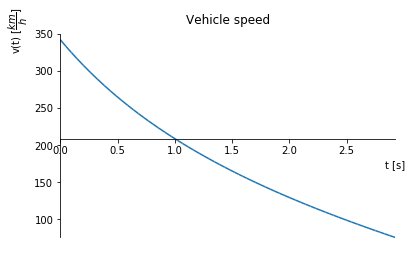

t_end = 2.922⋅second

In [29]:
speed_eq_sol = sympy.simplify(speed_eq_param_sol.subs(misc_data).subs(vehicle_data).subs(braking_data))

t_zero_speed = sympy.solve(speed_eq_sol.rhs)[0]*second
t_final_speed = t_end_sol.rhs.subs(misc_data).subs(vehicle_data).subs(braking_data).evalf()

t_end_plot = t_final_speed

#display(convert_to(t_zero_speed,second))
#display(convert_to(t_final_speed,second))
#display(convert_to(speed_eq_sol.rhs,kilometer/hour))

p = sympy.plot(convert_to(speed_eq_sol.rhs,kilometer/hour)/(kilometer/hour),(t,0,t_end_plot/second), show=False)
p.ylabel = 'v(t) $[\dfrac{km}{h}]$'
p.xlabel = 't [s]'
p.title = 'Vehicle speed'
p.show()

display(t_end_sol.subs(misc_data).subs(vehicle_data).subs(braking_data).evalf(4))

Once the speed function it is know, the front and rear braking torques can be obtained:

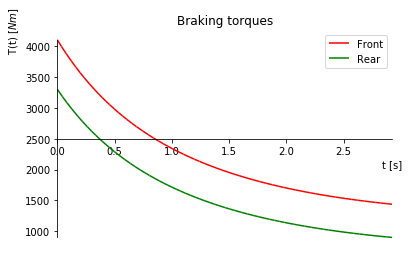

T_f(0) = 4102.0⋅meter⋅newton

Tᵣ(0) = 3301.0⋅meter⋅newton

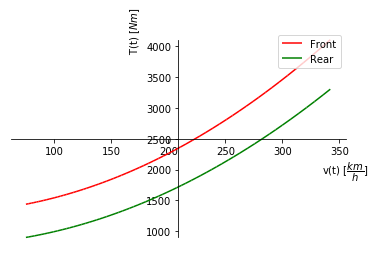

In [30]:
front_torque_sol = sympy.simplify(front_torque_eq_param_sol.subs(misc_data).subs(vehicle_data).subs(braking_data))
rear_torque_sol = sympy.simplify(rear_torque_eq_param_sol.subs(misc_data).subs(vehicle_data).subs(braking_data))

p = sympy.plot(convert_to(front_torque_sol.rhs,newton*meter)/(newton*meter),
               convert_to(rear_torque_sol.rhs,newton*meter)/(newton*meter),
               (t,0,t_end_plot/second), show=False)
p.ylabel = 'T(t) $[Nm]$'
p.xlabel = 't [s]'
p.title = 'Braking torques'
p[0].label='Front'
p[0].line_color = 'red'
p[1].label='Rear'
p[1].line_color = 'green'
p.legend = True
p.show()

display(convert_to(front_torque_sol.subs(t,0),newton*meter).n(4))
display(convert_to(rear_torque_sol.subs(t,0),newton*meter).n(4))

#(convert_to(front_torque_sol.rhs.subs(t,1*second),newton*meter)/(newton*meter)).n(4)

p1 = sympy.plotting.plot_parametric((convert_to(speed_eq_sol.rhs,kilometer/hour)/(kilometer/hour),
                                    convert_to(front_torque_sol.rhs,newton*meter)/(newton*meter),
                                    (t,0,t_end_plot/second)),
                                    (convert_to(speed_eq_sol.rhs,kilometer/hour)/(kilometer/hour),
                                    convert_to(rear_torque_sol.rhs,newton*meter)/(newton*meter),
                                    (t,0,t_end_plot/second)),
                                    show=False)

p1.ylabel = 'T(t) $[Nm]$'
p1.xlabel = 'v(t) $[\dfrac{km}{h}]$'
#p1.title = 'Torque vs speed'
p1[0].label='Front'
p1[0].line_color = 'red'
p1[1].label='Rear'
p1[1].line_color = 'green'
p1.legend = True
p1.show()

The above values for the torques are very conservative, since it is sperimentally observed that the pilot is not able to reach the braking limit istantaneously. Typically, the braking limit is reached within a few tenths of second, and this reduces the maximum torque that the braking system must be able to provide:

In [31]:
display(sympy.Eq(front_torque_sol.lhs.subs(t,0.1),convert_to(front_torque_sol.rhs.subs(t,0.1),newton*meter)).n(4))
display(sympy.Eq(rear_torque_sol.lhs.subs(t,0.1),convert_to(rear_torque_sol.rhs.subs(t,0.1),newton*meter)).n(4))

T_f(0.1⋅second) = 3817.0⋅meter⋅newton

Tᵣ(0.1⋅second) = 3044.0⋅meter⋅newton

The corresponding braking energies are:

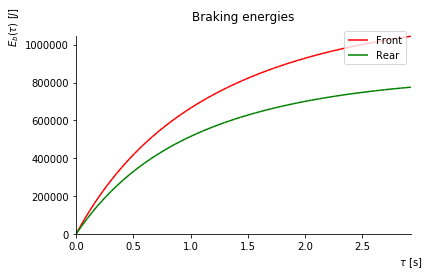

E_f__tot = 1.044e+6⋅joule

E_r__tot = 7.756e+5⋅joule

In [32]:
#dummy2 = sympy.simplify(dummy1.subs(front_energy_dict).subs(t_end,t_end_sol.rhs))
#display(dummy2)

#display(const_dict)

dict1 = {A: const_dict[A].subs(misc_data).subs(vehicle_data),
         B: const_dict[B].subs(misc_data).subs(vehicle_data)}
#display(dict1)
#display(speed_fun_const)
dict2 = {C: speed_fun_const[C].subs(dict1),
         D: speed_fun_const[D].subs(dict1)}
#display(dict2)
#display(const)
dict3 = {dummy_const: const[dummy_const].subs(dict2).subs(braking_data)}
#display(dict3)
#display(t_final_speed)
#display(front_energy_dict)
dict4 = {C1: front_energy_dict[C1].subs(misc_data).subs(vehicle_data),
         C2: front_energy_dict[C2].subs(misc_data).subs(vehicle_data),
         C3: front_energy_dict[C3].subs(misc_data).subs(vehicle_data),
         C4: front_energy_dict[C4].subs(misc_data).subs(vehicle_data)}
#display(dict4)

dict5 = {C1: rear_energy_dict[C1].subs(misc_data).subs(vehicle_data),
         C2: rear_energy_dict[C2].subs(misc_data).subs(vehicle_data),
         C3: rear_energy_dict[C3].subs(misc_data).subs(vehicle_data),
         C4: rear_energy_dict[C4].subs(misc_data).subs(vehicle_data)}
#display(dict5)

front_brake_energy_cum_fun = braking_energy_eq.subs(E_b(tau),E_f(tau)).subs(dict2).subs(dict3).subs(dict4).subs(misc_data)
rear_brake_energy_cum_fun = braking_energy_eq.subs(E_b(tau),E_r(tau)).subs(dict2).subs(dict3).subs(dict5).subs(misc_data)

front_brake_energy = convert_to(braking_energy_eq.subs(E_b(tau),E_f_tot).subs(dict2).subs(dict3).subs(dict4).subs(tau,t_final_speed),joule)
rear_brake_energy = convert_to(braking_energy_eq.subs(E_b(tau),E_r_tot).subs(dict2).subs(dict3).subs(dict5).subs(tau,t_final_speed),joule)

p = sympy.plot(sympy.collect(convert_to(sympy.expand(front_brake_energy_cum_fun.rhs),joule),joule)/joule,
               sympy.collect(convert_to(sympy.expand(rear_brake_energy_cum_fun.rhs),joule),joule)/joule,
               (tau,0,t_end_plot/second), show=False)

p.ylabel = r'$E_b(\tau)$ $[J]$'
p.xlabel = r'$\tau$ [s]'
p.title = 'Braking energies'
p[0].label='Front'
p[0].line_color = 'red'
p[1].label='Rear'
p[1].line_color = 'green'
p.legend = True
p.show()

display(front_brake_energy.n(4))
display(rear_brake_energy.n(4))

and the thermal power dissipation:

In [33]:
t_final_speed_old = t_end_sol.rhs.subs(misc_data).subs(vehicle_data_old).subs(braking_data_old).evalf()

dict1_old = {A: const_dict[A].subs(misc_data).subs(vehicle_data_old),
             B: const_dict[B].subs(misc_data).subs(vehicle_data_old)}
#display(dict1)
#display(speed_fun_const)
dict2_old = {C: speed_fun_const[C].subs(dict1_old),
             D: speed_fun_const[D].subs(dict1_old)}
#display(dict2)
#display(const)
dict3_old = {dummy_const: const[dummy_const].subs(dict2_old).subs(braking_data_old)}
#display(dict3)
#display(t_final_speed)
#display(front_energy_dict)
dict4_old = {C1: front_energy_dict[C1].subs(misc_data).subs(vehicle_data_old),
             C2: front_energy_dict[C2].subs(misc_data).subs(vehicle_data_old),
             C3: front_energy_dict[C3].subs(misc_data).subs(vehicle_data_old),
             C4: front_energy_dict[C4].subs(misc_data).subs(vehicle_data_old)}
#display(dict4)

dict5_old = {C1: rear_energy_dict[C1].subs(misc_data).subs(vehicle_data_old),
             C2: rear_energy_dict[C2].subs(misc_data).subs(vehicle_data_old),
             C3: rear_energy_dict[C3].subs(misc_data).subs(vehicle_data_old),
             C4: rear_energy_dict[C4].subs(misc_data).subs(vehicle_data_old)}

front_brake_energy_old = convert_to(braking_energy_eq.subs(E_b(tau),E_f_past).subs(dict2_old).subs(dict3_old).subs(dict4_old).subs(tau,t_final_speed_old),joule)
rear_brake_energy_old = convert_to(braking_energy_eq.subs(E_b(tau),E_r_past).subs(dict2_old).subs(dict3_old).subs(dict5_old).subs(tau,t_final_speed_old),joule)

#display(front_brake_energy_old.n(4))
#display(rear_brake_energy_old.n(4))

display(sympy.Eq(delta_P_th_f,
                 sympy.Eq(delta_E_f,
                          convert_to(((E_f_tot-E_f_past)/E_f_past).subs({E_f_tot: front_brake_energy.rhs,
                                                                         E_f_past: front_brake_energy_old.rhs}),percent))).n(2))
display(sympy.Eq(delta_P_th_r,
                 sympy.Eq(delta_E_r,
                          convert_to(((E_r_tot-E_r_past)/E_r_past).subs({E_r_tot: rear_brake_energy.rhs,
                                                                         E_r_past: rear_brake_energy_old.rhs}),percent))).n(2))

\Delta\dot{Q}_f = \Delta E_f__{tot} = 14.0⋅percent

\Delta\dot{Q}ᵣ = \Delta E_r__{tot} = 19.0⋅percent

In [34]:
from ipywidgets import interact, interact_manual, interactive_output, FloatSlider, HBox, VBox, Label, Accordion, Layout

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

def plot_fun(Cd_val=vehicle_data[Cd],
             Cl_val=vehicle_data[Cl],
             S_val=vehicle_data[S] / (meter ** 2), 
             alpha_val=vehicle_data[alpha], 
             h_val=vehicle_data[h] / meter, 
             h_cp_val=vehicle_data[h_cp] / meter, 
             k1_val=vehicle_data[k1] * (meter / second) ** 2, 
             k2_val=vehicle_data[k2] * (meter / second), 
             k3_val=vehicle_data[k3], 
             l_val=vehicle_data[l] / meter, 
             m_val=vehicle_data[m] / kilogram, 
             mu_val=vehicle_data[mu], 
             r_f_val=vehicle_data[r_f] / meter, 
             r_r_val=vehicle_data[r_r] / meter, 
             v_0_val=convert_to(braking_data[v_0], kilometer / hour) / (kilometer / hour), 
             v_end_val=convert_to(braking_data[v_end], kilometer / hour) / (kilometer / hour), 
             rho_val=misc_data[rho] / kilogram * meter ** 3):
    
    misc_data = {g: g_val * meter / second ** 2,
                 rho: rho_val * kilogram / meter ** 3,
                 t: t * second,
                 tau: tau * second}
    
    vehicle_data = {m: m_val * kilogram,
                    S: S_val * meter ** 2,
                    mu: mu_val,
                    l: l_val * meter,
                    alpha: alpha_val,
                    h: h_val * meter,
                    h_cp: h_cp_val * meter,
                    Cl: Cl_val,
                    Cd: Cd_val,
                    k1: k1_val * ( meter / second) ** -2,
                    k2: k2_val * ( meter / second) ** -1,
                    k3: k3_val,
                    r_f: r_f_val * meter,
                    r_r: r_r_val * meter}
    
    braking_data = {v_0: convert_to(v_0_val * kilometer / hour, meter / second),
                    v_end: convert_to(v_end_val * kilometer / hour, meter / second),
                    t_0: 0 * second,
                    t_diss: 5 * second}
    
    speed_eq_sol = sympy.simplify(speed_eq_param_sol.subs(misc_data).subs(vehicle_data).subs(braking_data))
    
    t_zero_speed = sympy.solve(speed_eq_sol.rhs)[0]*second
    t_final_speed = t_end_sol.rhs.subs(misc_data).subs(vehicle_data).subs(braking_data).evalf()
    
    t_end_plot = t_final_speed
    p1 = sympy.plot(convert_to(speed_eq_sol.rhs,kilometer/hour)/(kilometer/hour),(t,0,t_end_plot/second), show=False)
    p1.ylabel = 'v(t) $[\dfrac{km}{h}]$'
    p1.xlabel = 't [s]'
    p1.title = 'Vehicle speed'
    p1.show()
    
    front_torque_sol = front_torque_eq_param_sol.subs(misc_data).subs(vehicle_data).subs(braking_data)
    rear_torque_sol = rear_torque_eq_param_sol.subs(misc_data).subs(vehicle_data).subs(braking_data)
    
#    display(convert_to(front_torque_sol.rhs.subs(t,0),newton*meter))
    
    p2 = sympy.plot(front_torque_sol.rhs/(kilogram*(meter/second)**2),
                   rear_torque_sol.rhs/(kilogram*(meter/second)**2),
                   (t,0,t_end_plot/second), show=False)
    
    p2.ylabel = 'T(t) $[Nm]$'
    p2.xlabel = 't [s]'
    #p2.title = 'Braking torques'
    p2[0].label='Front'
    p2[0].line_color = 'red'
    p2[1].label='Rear'
    p2[1].line_color = 'green'
    p2.legend = True
    p2.show()
    
    p3 = sympy.plotting.plot_parametric((convert_to(speed_eq_sol.rhs,kilometer/hour)/(kilometer/hour),
                                         front_torque_sol.rhs/(kilogram*(meter/second)**2),
                                         (t,0,t_end_plot/second)),
                                        (convert_to(speed_eq_sol.rhs,kilometer/hour)/(kilometer/hour),
                                         rear_torque_sol.rhs/(kilogram*(meter/second)**2),
                                         (t,0,t_end_plot/second)),
                                        show=False)
    
    p3.ylabel = 'T(t) $[Nm]$'
    p3.xlabel = 'v(t) $[\dfrac{km}{h}]$'
    #p1.title = 'Torque vs speed'
    p3[0].label='Front'
    p3[0].line_color = 'red'
    p3[1].label='Rear'
    p3[1].line_color = 'green'
    p3.legend = True
    p3.show()
    
    dict1 = {A: const_dict[A].subs(misc_data).subs(vehicle_data),
             B: const_dict[B].subs(misc_data).subs(vehicle_data)}
    
    dict2 = {C: speed_fun_const[C].subs(dict1),
             D: speed_fun_const[D].subs(dict1)}
    
    dict3 = {dummy_const: const[dummy_const].subs(dict2).subs(braking_data)}
    
    dict4 = {C1: front_energy_dict[C1].subs(misc_data).subs(vehicle_data),
             C2: front_energy_dict[C2].subs(misc_data).subs(vehicle_data),
             C3: front_energy_dict[C3].subs(misc_data).subs(vehicle_data),
             C4: front_energy_dict[C4].subs(misc_data).subs(vehicle_data)}
    
    dict5 = {C1: rear_energy_dict[C1].subs(misc_data).subs(vehicle_data),
             C2: rear_energy_dict[C2].subs(misc_data).subs(vehicle_data),
             C3: rear_energy_dict[C3].subs(misc_data).subs(vehicle_data),
             C4: rear_energy_dict[C4].subs(misc_data).subs(vehicle_data)}
    
    front_brake_energy_cum_fun = braking_energy_eq.subs(E_b(tau),E_f(tau)).subs(dict2).subs(dict3).subs(dict4).subs(misc_data)
    rear_brake_energy_cum_fun = braking_energy_eq.subs(E_b(tau),E_r(tau)).subs(dict2).subs(dict3).subs(dict5).subs(misc_data)
    
    #display(sympy.collect(convert_to(sympy.expand(front_brake_energy_cum_fun.rhs),joule),joule)/joule)
    
    front_brake_energy = convert_to(braking_energy_eq.subs(E_b(tau),E_f_tot).subs(dict2).subs(dict3).subs(dict4).subs(tau,t_final_speed),joule).n(4)
    rear_brake_energy = convert_to(braking_energy_eq.subs(E_b(tau),E_r_tot).subs(dict2).subs(dict3).subs(dict5).subs(tau,t_final_speed),joule).n(4)
    
    p4 = sympy.plot(sympy.collect(convert_to(sympy.expand(front_brake_energy_cum_fun.rhs),joule),joule)/(kilo*joule),
                   sympy.collect(convert_to(sympy.expand(rear_brake_energy_cum_fun.rhs),joule),joule)/(kilo*joule),
                   (tau,0,t_end_plot/second), show=False)
    
    p4.ylabel = r'$E_b(\tau)$ $[kJ]$'
    p4.xlabel = r'$\tau$ [s]'
    p4.title = 'Braking energies'
    p4[0].label='Front'
    p4[0].line_color = 'red'
    p4[1].label='Rear'
    p4[1].line_color = 'green'
    p4.legend = True
    p4.show()
    
    #fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
    #move_sympyplot_to_axes(p1, ax1)
    #move_sympyplot_to_axes(p2, ax2)
    #move_sympyplot_to_axes(p3, ax3)
    #fig.tight_layout()
    #plt.show()
    
    display(t_end_sol.subs(misc_data).subs(vehicle_data).subs(braking_data).evalf(4))
    
    display(convert_to(front_torque_sol.subs(t,0),newton*meter).n(4))
    display(convert_to(rear_torque_sol.subs(t,0),newton*meter).n(4))
    
    display(front_brake_energy)
    display(rear_brake_energy)

In [35]:
Cd_widget = FloatSlider(value=vehicle_data[Cd],
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(C_d\)',
                        #continuous_update=False,
                        orientation='vertical')

Cl_widget = FloatSlider(value=vehicle_data[Cl],
                        min=1.5,
                        max=3.5,
                        step=0.01,
                        description=r'\(C_l\)',
                        continuous_update=False,
                        orientation='vertical')

S_widget = FloatSlider(value=vehicle_data[S] / (meter ** 2),
                        min=1.0,
                        max=2.0,
                        step=0.01,
                        description=r'\(S [m^2]\)',
                        continuous_update=False,
                        orientation='vertical')

alpha_widget = FloatSlider(value=vehicle_data[alpha],
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(\alpha\)',
                        continuous_update=False,
                        orientation='vertical')

h_widget = FloatSlider(value=vehicle_data[h] / meter,
                        min=0.0,
                        max=0.5,
                        step=0.005,
                        description=r'\(h [m]\)',
                        continuous_update=False,
                        orientation='vertical',
                        readout_format='.3f')

h_cp_widget = FloatSlider(value=vehicle_data[h_cp] / meter,
                        min=0.0,
                        max=0.5,
                        step=0.005,
                        description=r'\(h_{cp} [m]\)',
                        continuous_update=False,
                        orientation='vertical',
                        readout_format='.3f')

k1_widget = FloatSlider(value=vehicle_data[k1] * (meter / second) ** 2,
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(k_1 [\frac{m^2}{s^2}]\)',
                        continuous_update=False,
                        orientation='vertical')

k2_widget = FloatSlider(value=vehicle_data[k2] * (meter / second),
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(k_2 [\frac{m}{s}]\)',
                        continuous_update=False,
                        orientation='vertical')

k3_widget = FloatSlider(value=vehicle_data[k3],
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(k_3\)',
                        continuous_update=False,
                        orientation='vertical')

l_widget = FloatSlider(value=vehicle_data[l] / meter,
                        min=2.5,
                        max=4.0,
                        step=0.05,
                        description=r'\(l [m]\)',
                        continuous_update=False,
                        orientation='vertical')

m_widget = FloatSlider(value=vehicle_data[m] / kilogram,
                        min=800.0,
                        max=1000.0,
                        step=1.0,
                        description=r'\(m [kg]\)',
                        continuous_update=False,
                        orientation='vertical')

rho_widget = FloatSlider(value=misc_data[rho] / (kilogram / meter ** 3),
                         min=1.1,
                         max=1.3,
                         step=0.001,
                         description=r'\(\rho [\frac{kg}{m^3}]\)',
                         continuous_update=False,
                         orientation='vertical',
                         readout_format='.3f')

mu_widget = FloatSlider(value=vehicle_data[mu],
                        min=1.0,
                        max=2.0,
                        step=0.05,
                        description=r'\(\mu\)',
                        continuous_update=False,
                        orientation='vertical')

r_f_widget = FloatSlider(value=vehicle_data[r_f] / meter,
                        min=0.25,
                        max=0.4,
                        step=0.01,
                        description=r'\(r_f [m]\)',
                        continuous_update=False,
                        orientation='vertical')

r_r_widget = FloatSlider(value=vehicle_data[r_r] / meter,
                        min=0.25,
                        max=0.4,
                        step=0.01,
                        description=r'\(r_r [m]\)',
                        continuous_update=False,
                        orientation='vertical')

v_0_widget = FloatSlider(value=convert_to(braking_data[v_0], kilometer / hour) / (kilometer / hour),
                        min=300.0,
                        max=350.0,
                        step=1.0,
                        description=r'\(v_0 [\frac{km}{h}]\)',
                        #continuous_update=False,
                        orientation='vertical')

v_end_widget = FloatSlider(value=convert_to(braking_data[v_end], kilometer / hour) / (kilometer / hour),
                        min=0.0,
                        max=90.0,
                        step=1.0,
                        description=r'\(v_{end} [\frac{km}{h}]\)',
                        continuous_update=False,
                        orientation='vertical')

aero_box = HBox([Cd_widget, Cl_widget, k1_widget, k2_widget, k3_widget])

geometry_box = HBox([S_widget, h_widget, h_cp_widget, l_widget, r_f_widget, r_r_widget])

other_box = HBox([rho_widget, alpha_widget, m_widget, mu_widget, v_0_widget, v_end_widget])

ui = Accordion([aero_box, geometry_box, other_box])
ui.set_title(0,'Aerodynamics')
ui.set_title(1,'Geometry')
ui.set_title(2,'Misc')

interactive_plot = interactive_output(plot_fun,
                            {'Cd_val':Cd_widget,
                            'Cl_val':Cl_widget,
                            'S_val':S_widget,
                            'alpha_val':alpha_widget,
                            'h_val':h_widget,
                            'h_cp_val':h_cp_widget,
                            'k1_val':k1_widget,
                            'k2_val':k2_widget,
                            'k3_val':k3_widget,
                            'l_val':l_widget,
                            'm_val':m_widget,
                            'mu_val':mu_widget,
                            'r_f_val':r_f_widget,
                            'r_r_val':r_r_widget,
                            'v_0_val':v_0_widget,
                            'v_end_val':v_end_widget,
                            'rho_val':rho_widget})

#display(ui, interactive_plot)

#output = interactive_plot.children[-1]
#output.layout.height = '350px'
#interactive_plot

In [36]:
display(const)
display(speed_fun_const)
display(const_dict)
display(front_energy_dict)
#braking_energy_eq.rhs.subs(const).subs(speed_fun_const).subs(const_dict).subs(front_energy_dict)

⎧       ⎛v₀⎞⎫
⎪   atan⎜──⎟⎪
⎨       ⎝Γ ⎠⎬
⎪Ε: ────────⎪
⎩      Δ    ⎭

⎧             √Β⎫
⎨Δ: √Α⋅√Β, Γ: ──⎬
⎩             √Α⎭

⎧   0.5⋅S⋅ρ⋅(C_d + Cₗ⋅μ)        ⎫
⎨Α: ────────────────────, Β: g⋅μ⎬
⎩            m                  ⎭

⎧                              2                                              
⎪                   0.5⋅g⋅h⋅m⋅μ                   0.25⋅C_d⋅S⋅h⋅μ⋅ρ   0.25⋅C_d⋅
⎨C₁: -0.5⋅α⋅g⋅m⋅μ + ──────────── + 0.5⋅g⋅m⋅μ, C₂: ──────────────── - ─────────
⎪                        l                               l                    
⎩                                                                             

                          2                                                   
S⋅h_cp⋅μ⋅ρ   0.25⋅Cₗ⋅S⋅h⋅μ ⋅ρ                                                 
────────── + ──────────────── + 0.25⋅Cₗ⋅S⋅k₃⋅μ⋅ρ, C₃: 0.25⋅Cₗ⋅S⋅k₂⋅μ⋅ρ, C₄: 0.
l                   l                                                         
                                                                              

              ⎫
              ⎪
25⋅Cₗ⋅S⋅k₁⋅μ⋅ρ⎬
              ⎪
              ⎭

In [37]:
t_final_fun = sympy.lambdify([v_end, m, v_0, mu, Cl, Cd, S, rho], t_end_sol.rhs.subs({g: g_val}))

def x_fun(v_end, m, v_0, mu, Cl, Cd, S, rho):
    return np.linspace(0, t_final_fun(v_end * 1000 / 3600, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho), 101)

y_fun_l1 = sympy.lambdify([t, m, v_0, mu, Cl, Cd, S, rho], speed_eq_param_sol.rhs.subs({g: g_val}))

def y_fun_1(t, m, v_0, mu, Cl, Cd, S, rho) :
    return y_fun_l1(t, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho) * 3600 / 1000

y_fun_l2 = sympy.lambdify([t, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r], front_torque_eq_param_sol.rhs.subs({g: g_val}))

def y_fun_2(t, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r) :
    return y_fun_l2(t, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r)

y_fun_l3 = sympy.lambdify([t, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r], rear_torque_eq_param_sol.rhs.subs({g: g_val}))

def y_fun_3(t, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r) :
    return y_fun_l3(t, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r)

y_fun_l4 = sympy.lambdify([tau, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3],
                          braking_energy_eq.rhs.subs(const).subs(speed_fun_const).subs(const_dict).subs(front_energy_dict).subs({g: g_val}))

def y_fun_4(t, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3) :
    return y_fun_l4(t, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3)/1000000

#display(t_final_fun(125/6, 933.0, 95.0, 1.3, 2.98, 0.75, 1.42, 1.225))

#y_fun_l4(t_final_fun(125/6, 933.0, 95.0, 1.3, 2.98, 0.75, 1.42, 1.225),
#         933.0, 95.0, 1.3, 2.98, 0.75, 1.42, 1.225, 3.25, 0.48, 0.265, 0.265, 0.0, 0.0, 0.42)

y_fun_l5 = sympy.lambdify([tau, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3],
                          braking_energy_eq.rhs.subs(const).subs(speed_fun_const).subs(const_dict).subs(rear_energy_dict).subs({g: g_val}))

def y_fun_5(t, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3) :
    return y_fun_l5(t, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3)/1000000

#y_fun_l5(t_final_fun(125/6, 933.0, 95.0, 1.3, 2.98, 0.75, 1.42, 1.225),
#         933.0, 95.0, 1.3, 2.98, 0.75, 1.42, 1.225, 3.25, 0.48, 0.265, 0.265, 0.0, 0.0, 0.42)

In [38]:
import nbinteract as nbi

Cd_widget = FloatSlider(value=vehicle_data[Cd],
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(C_d\)',
                        #continuous_update=False,
                        orientation='vertical',
                       )

Cl_widget = FloatSlider(value=vehicle_data[Cl],
                        min=1.5,
                        max=3.5,
                        step=0.01,
                        description=r'\(C_l\)',
                        #continuous_update=False,
                        orientation='vertical',
                       )

S_widget = FloatSlider(value=vehicle_data[S] / (meter ** 2),
                        min=1.0,
                        max=2.0,
                        step=0.01,
                        description=r'\(S [m^2]\)',
                        #continuous_update=False,
                        orientation='vertical',
                      )

alpha_widget = FloatSlider(value=vehicle_data[alpha],
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(\alpha\)',
                        #continuous_update=False,
                        orientation='vertical',
                          )

h_widget = FloatSlider(value=vehicle_data[h] / meter,
                        min=0.0,
                        max=0.5,
                        step=0.005,
                        description=r'\(h [m]\)',
                        #continuous_update=False,
                        orientation='vertical',
                        readout_format='.3f',
                      )

h_cp_widget = FloatSlider(value=vehicle_data[h_cp] / meter,
                        min=0.0,
                        max=0.5,
                        step=0.005,
                        description=r'\(h_{cp} [m]\)',
                        #continuous_update=False,
                        orientation='vertical',
                        readout_format='.3f',
                         )

k1_widget = FloatSlider(value=vehicle_data[k1] * (meter / second) ** 2,
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(k_1 [\frac{m^2}{s^2}]\)',
                        #continuous_update=False,
                        orientation='vertical',
                       )

k2_widget = FloatSlider(value=vehicle_data[k2] * (meter / second),
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(k_2 [\frac{m}{s}]\)',
                        #continuous_update=False,
                        orientation='vertical',
                       )

k3_widget = FloatSlider(value=vehicle_data[k3],
                        min=0.0,
                        max=1.0,
                        step=0.01,
                        description=r'\(k_3\)',
                        #continuous_update=False,
                        orientation='vertical',
                       )

l_widget = FloatSlider(value=vehicle_data[l] / meter,
                        min=2.5,
                        max=4.0,
                        step=0.05,
                        description=r'\(l [m]\)',
                        #continuous_update=False,
                        orientation='vertical',
                      )

m_widget = FloatSlider(value=vehicle_data[m] / kilogram,
                        min=800.0,
                        max=1000.0,
                        step=1.0,
                        description=r'\(m [kg]\)',
                        #continuous_update=False,
                        orientation='vertical',
                      )

rho_widget = FloatSlider(value=misc_data[rho] / (kilogram / meter ** 3),
                         min=1.1,
                         max=1.3,
                         step=0.001,
                         description=r'\(\rho [\frac{kg}{m^3}]\)',
                         #continuous_update=False,
                         orientation='vertical',
                         readout_format='.3f',
                        )

mu_widget = FloatSlider(value=vehicle_data[mu],
                        min=1.0,
                        max=2.0,
                        step=0.05,
                        description=r'\(\mu\)',
                        #continuous_update=False,
                        orientation='vertical',
                       )

r_f_widget = FloatSlider(value=vehicle_data[r_f] / meter,
                        min=0.25,
                        max=0.4,
                        step=0.01,
                        description=r'\(r_f [m]\)',
                        #continuous_update=False,
                        orientation='vertical',
                        )

r_r_widget = FloatSlider(value=vehicle_data[r_r] / meter,
                        min=0.25,
                        max=0.4,
                        step=0.01,
                        description=r'\(r_r [m]\)',
                        #continuous_update=False,
                        orientation='vertical',
                        )

v_0_widget = FloatSlider(value=convert_to(braking_data[v_0], kilometer / hour) / (kilometer / hour),
                        min=300.0,
                        max=350.0,
                        step=1.0,
                        description=r'\(v_0 [\frac{km}{h}]\)',
                        #continuous_update=False,
                        orientation='vertical',
                        )

v_end_widget = FloatSlider(value=convert_to(braking_data[v_end], kilometer / hour) / (kilometer / hour),
                        min=0.0,
                        max=90.0,
                        step=1.0,
                        description=r'\(v_{end} [\frac{km}{h}]\)',
                        #continuous_update=False,
                        orientation='vertical',
                          )

aero_box = HBox([Cd_widget, Cl_widget, k1_widget, k2_widget, k3_widget])

geometry_box = HBox([S_widget, h_widget, h_cp_widget, l_widget, r_f_widget, r_r_widget])

other_box = HBox([rho_widget, alpha_widget, m_widget, mu_widget, v_0_widget, v_end_widget])

controls = Accordion([aero_box, geometry_box, other_box])
controls.set_title(0,'Aerodynamics')
controls.set_title(1,'Geometry')
controls.set_title(2,'Misc')

t_end_widget = interactive_output(lambda v_end, m, v_0, mu, Cl, Cd, S, rho:
                                  print(format(t_final_fun(v_end * 1000 / 3600, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho),'.3f')),
                                  {'v_end': v_end_widget,
                                   'm': m_widget,
                                   'v_0': v_0_widget,
                                   'mu': mu_widget,
                                   'Cl': Cl_widget,
                                   'Cd': Cd_widget,
                                   'S': S_widget,
                                   'rho': rho_widget,
                                  }
                                 )

T_f_0_widget = interactive_output(lambda m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r :
                                  print(format(y_fun_2(0, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r),'.0f')),
                                  {'m': m_widget,
                                   'v_0': v_0_widget,
                                   'mu': mu_widget,
                                   'Cl': Cl_widget,
                                   'Cd': Cd_widget,
                                   'S': S_widget,
                                   'rho': rho_widget,
                                   'l': l_widget,
                                   'alpha': alpha_widget,
                                   'h': h_widget,
                                   'h_cp': h_cp_widget,
                                   'k1': k1_widget,
                                   'k2': k2_widget,
                                   'k3': k3_widget,
                                   'r_f': r_f_widget,
                                   'r_r': r_r_widget,
                                  }
                                 )

T_f_widget = interactive_output(lambda m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r :
                                  print(format(y_fun_2(0.1, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r),'.0f')),
                                  {'m': m_widget,
                                   'v_0': v_0_widget,
                                   'mu': mu_widget,
                                   'Cl': Cl_widget,
                                   'Cd': Cd_widget,
                                   'S': S_widget,
                                   'rho': rho_widget,
                                   'l': l_widget,
                                   'alpha': alpha_widget,
                                   'h': h_widget,
                                   'h_cp': h_cp_widget,
                                   'k1': k1_widget,
                                   'k2': k2_widget,
                                   'k3': k3_widget,
                                   'r_f': r_f_widget,
                                   'r_r': r_r_widget,
                                  }
                                 )

T_r_0_widget = interactive_output(lambda m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r :
                                  print(format(y_fun_3(0, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r),'.0f')),
                                  {'m': m_widget,
                                   'v_0': v_0_widget,
                                   'mu': mu_widget,
                                   'Cl': Cl_widget,
                                   'Cd': Cd_widget,
                                   'S': S_widget,
                                   'rho': rho_widget,
                                   'l': l_widget,
                                   'alpha': alpha_widget,
                                   'h': h_widget,
                                   'h_cp': h_cp_widget,
                                   'k1': k1_widget,
                                   'k2': k2_widget,
                                   'k3': k3_widget,
                                   'r_f': r_f_widget,
                                   'r_r': r_r_widget,
                                  }
                                 )

T_r_widget = interactive_output(lambda m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r :
                                  print(format(y_fun_3(0.1, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3, r_f, r_r),'.0f')),
                                  {'m': m_widget,
                                   'v_0': v_0_widget,
                                   'mu': mu_widget,
                                   'Cl': Cl_widget,
                                   'Cd': Cd_widget,
                                   'S': S_widget,
                                   'rho': rho_widget,
                                   'l': l_widget,
                                   'alpha': alpha_widget,
                                   'h': h_widget,
                                   'h_cp': h_cp_widget,
                                   'k1': k1_widget,
                                   'k2': k2_widget,
                                   'k3': k3_widget,
                                   'r_f': r_f_widget,
                                   'r_r': r_r_widget,
                                  }
                                 )

E_f_widget = interactive_output(lambda v_end, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3 :
                                  print(format(y_fun_4(t_final_fun(v_end * 1000 / 3600, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho),
                                                       m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3),'.3f')),
                                  {'v_end': v_end_widget,
                                   'm': m_widget,
                                   'v_0': v_0_widget,
                                   'mu': mu_widget,
                                   'Cl': Cl_widget,
                                   'Cd': Cd_widget,
                                   'S': S_widget,
                                   'rho': rho_widget,
                                   'l': l_widget,
                                   'alpha': alpha_widget,
                                   'h': h_widget,
                                   'h_cp': h_cp_widget,
                                   'k1': k1_widget,
                                   'k2': k2_widget,
                                   'k3': k3_widget,
                                  }
                                 )

E_r_widget = interactive_output(lambda v_end, m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3 :
                                  print(format(y_fun_5(t_final_fun(v_end * 1000 / 3600, m, v_0 * 1000 / 3600, mu, Cl, Cd, S, rho),
                                                       m, v_0, mu, Cl, Cd, S, rho, l, alpha, h, h_cp, k1, k2, k3),'.3f')),
                                  {'v_end': v_end_widget,
                                   'm': m_widget,
                                   'v_0': v_0_widget,
                                   'mu': mu_widget,
                                   'Cl': Cl_widget,
                                   'Cd': Cd_widget,
                                   'S': S_widget,
                                   'rho': rho_widget,
                                   'l': l_widget,
                                   'alpha': alpha_widget,
                                   'h': h_widget,
                                   'h_cp': h_cp_widget,
                                   'k1': k1_widget,
                                   'k2': k2_widget,
                                   'k3': k3_widget,
                                  }
                                 )

#fig1 = nbi.Figure()

opts = {
    'title': 'Speed vs Time',
    'xlabel': 'time [s]',
    'ylabel': 'speed [km/h]',
    #'xlim': (0, 50),
    #'ylim': (0, 55),
    #'animation_duration': 250,
}

speed_plot = nbi.line(x_fun, y_fun_1,
#fig1.line(x_fun, y_fun_1,
                      v_end=v_end_widget,
                      m=m_widget,
                      v_0=v_0_widget,
                      mu=mu_widget,
                      Cl=Cl_widget,
                      Cd=Cd_widget,
                      S=S_widget,
                      rho=rho_widget,
                      options=opts)

opts = {
    'title': 'Torque vs Time',
    'xlabel': 'time [s]',
    'ylabel': 'torque [Nm]',
    #'xlim': (0, 50),
    #'ylim': (0, 55),
    #'animation_duration': 250,
}

#torque_plot = nbi.line(x_fun_2, y_fun_4,
#                       v_end=v_end_widget,
#                       m=m_widget,
#                       v_0=v_0_widget,
#                       mu=mu_widget,
#                       Cl=Cl_widget,
#                       Cd=Cd_widget,
#                       S=S_widget,
#                       rho=rho_widget,
#                       l=l_widget,
#                       alpha=alpha_widget,
#                       h=h_widget,
#                       h_cp=h_cp_widget,
#                       k1=k1_widget,
#                       k2=k2_widget,
#                       k3=k3_widget,
#                       r_f=r_f_widget,
#                       r_r=r_r_widget,
#                       options=opts)

fig2 = nbi.Figure(options=opts)

#f_torque_plot = nbi.line(x_fun, y_fun_2,
fig2.line(x_fun, y_fun_2,
                       v_end=v_end_widget,
                       m=m_widget,
                       v_0=v_0_widget,
                       mu=mu_widget,
                       Cl=Cl_widget,
                       Cd=Cd_widget,
                       S=S_widget,
                       rho=rho_widget,
                       l=l_widget,
                       alpha=alpha_widget,
                       h=h_widget,
                       h_cp=h_cp_widget,
                       k1=k1_widget,
                       k2=k2_widget,
                       k3=k3_widget,
                       r_f=r_f_widget,
                       r_r=r_r_widget,
                       options=opts,
         )

#r_torque_plot = nbi.line(x_fun, y_fun_3,
fig2.line(x_fun, y_fun_3,
                       v_end=v_end_widget,
                       m=m_widget,
                       v_0=v_0_widget,
                       mu=mu_widget,
                       Cl=Cl_widget,
                       Cd=Cd_widget,
                       S=S_widget,
                       rho=rho_widget,
                       l=l_widget,
                       alpha=alpha_widget,
                       h=h_widget,
                       h_cp=h_cp_widget,
                       k1=k1_widget,
                       k2=k2_widget,
                       k3=k3_widget,
                       r_f=r_f_widget,
                       r_r=r_r_widget,
                       options=opts)

fig2.figure.marks[0].colors = ['#FF0000']
fig2.figure.marks[0].labels = ['front']
fig2.figure.marks[0].display_legend = True
fig2.figure.marks[1].colors = ['#00FF00']
fig2.figure.marks[1].labels = ['rear']
fig2.figure.marks[1].display_legend = True

opts = {
    'title': 'Energy vs Time',
    'xlabel': 'time [s]',
    'ylabel': 'energy [MJ]',
    #'xlim': (0, 50),
    #'ylim': (0, 55),
    #'animation_duration': 250,
}

fig3 = nbi.Figure(options=opts)

fig3.line(x_fun, y_fun_4,
                       v_end=v_end_widget,
                       m=m_widget,
                       v_0=v_0_widget,
                       mu=mu_widget,
                       Cl=Cl_widget,
                       Cd=Cd_widget,
                       S=S_widget,
                       rho=rho_widget,
                       l=l_widget,
                       alpha=alpha_widget,
                       h=h_widget,
                       h_cp=h_cp_widget,
                       k1=k1_widget,
                       k2=k2_widget,
                       k3=k3_widget,
                       options=opts,
         )

#r_torque_plot = nbi.line(x_fun, y_fun_3,
fig3.line(x_fun, y_fun_5,
                       v_end=v_end_widget,
                       m=m_widget,
                       v_0=v_0_widget,
                       mu=mu_widget,
                       Cl=Cl_widget,
                       Cd=Cd_widget,
                       S=S_widget,
                       rho=rho_widget,
                       l=l_widget,
                       alpha=alpha_widget,
                       h=h_widget,
                       h_cp=h_cp_widget,
                       k1=k1_widget,
                       k2=k2_widget,
                       k3=k3_widget,
                       options=opts)

fig3.figure.marks[0].colors = ['#FF0000']
fig3.figure.marks[0].labels = ['front']
fig3.figure.marks[0].display_legend = True
fig3.figure.marks[1].colors = ['#00FF00']
fig3.figure.marks[1].labels = ['rear']
fig3.figure.marks[1].display_legend = True

ui = VBox([HBox([controls,VBox([HBox([Label(value='$t_{end} = $'), t_end_widget, Label(value='$[s]$')]),
                                HBox([Label(value='$T_{f}(0) = $'), T_f_0_widget, Label(value='$[Nm]$')]),
                                HBox([Label(value='$T_{r}(0) = $'), T_r_0_widget, Label(value='$[Nm]$')]),
                                HBox([Label(value='$T_{f}(0.1) = $'), T_f_widget, Label(value='$[Nm]$')]),
                                HBox([Label(value='$T_{r}(0.1) = $'), T_r_widget, Label(value='$[Nm]$')]),
                                HBox([Label(value='$E_{f}(t_{end}) = $'), E_f_widget, Label(value='$[MJ]$')]),
                                HBox([Label(value='$E_{r}(t_{end}) = $'), E_r_widget, Label(value='$[MJ]$')]),])],
                align_content = 'stretch'),
           HBox([speed_plot.children[1], fig2.figure, fig3.figure]),
           #f_torque_plot.children[1],
           #r_torque_plot.children[1],
          ])

display(ui)